In [1]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Table Of Content
1. Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
2. Assessing data
3. Cleaning data


Storing, analyzing, and visualizing your wrangled data
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

# Data Gathering

In [2]:
# Twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# The tweet image predictions TSV file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = pd.read_csv(url, sep = '\t')


In [4]:
# Provided by udacity
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
       # count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
           # tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
          #  print("Fail")
           # fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [5]:
# save the tweets to a Dataframe
tweets_df = pd.read_json('tweet_json.txt', lines = True)
# get the necessery columns
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
# save the columns into thedataframe
all_tweets = tweets_df[columns_of_interest]
all_tweets = all_tweets.rename(columns={'id': 'tweet_id'})

In [6]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing the data

In [7]:
all_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# examining denominator and numerator values
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
dog_names = twitter_archive.name.unique()
#dog_names

In [16]:
#take a look at dog names 
#find any missing names or incorrect ones.
incorrect_names = twitter_archive[twitter_archive.name.str.contains('^[a-z]|None')]
incorrect_names.name.unique()

array(['None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Quality Issues
1. Some of the dog names are incorrect/missing.
2. Columns timestamp and retweeted_status_timestamp are strings when they should be Datetime.
3. Get rid of outliers in rating_numerator and rating_denominator.
4. Drop replies and retweets as they are not original tweets.
5. Merge the dog breeds into one column, given the highest confidenice.
6. Missing values in expanded_urls.
7. clean up the source column remove HTML tags.
8. Remove underscore in breed names.


### Tidness Issues
1. Dog type is represnted using four columns: Doggo, Floofer, Puppo and Pupper, we can merge them into one column with the dog type.
2. Remove unnecessary columns.

In [17]:
# Create copies of all our dataframes.
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
all_tweets_clean = all_tweets.copy()

# Cleaning The Data

#### 1. Dog names are incorrect or missing.

We will use the df we previously created (incorrect_names) which holds all rows with wrong/missing dog names, invalid names will be replaced with NULL

In [18]:
incorrect_names.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None


#### Code

In [19]:

twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(incorrect_names['name'],np.NaN)



#### Test

In [20]:
# Check to see if there still exists any incorrect names in our tweets.
twitter_archive_clean['name'].isin(incorrect_names['name']).sum()

0

#### 2. Columns timestamp and retweeted_status_timestamp are strings when they should be Datetime.

#### Code

In [21]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [22]:
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

#### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

#### 3. Get rid of outliers in rating_numerator and rating_denominator.

First we will change the rating_denominator to values between 0-10 then we will create a column with the overall rating which will be: rating_numerator/rating_denominator

#### Code

In [24]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.replace(0, 10)
twitter_archive_clean.rating_denominator.value_counts()

10     2334
50        3
11        3
80        2
20        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
2         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator


#### Test

In [26]:
twitter_archive_clean.rating.value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
96.000000       1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
Name: rating, dtype: int64

#### 4. Drop replies and retweets as they are not original tweets.


#### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[(( twitter_archive_clean.retweeted_status_id.isnull()) &\
                                               ( twitter_archive_clean.in_reply_to_status_id.isnull()))]

#### Test

In [28]:
twitter_archive_clean.in_reply_to_status_id.sum()

0.0

In [29]:
twitter_archive_clean.retweeted_status_id.sum()

0.0

#### 5. Merge the dog breeds into one column, given the highest confidenice

Since we have so many columns of the breed in the image prediction df, we will choose p1 as it represents the most likely prediction and drop the rest, after that we will rename the column to 'breed'.  

#### Code

In [30]:
image_predictions_clean = image_predictions_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)
# 'p1_conf','p1_dog' are needed for later

In [31]:
image_predictions_clean.rename(columns={'p1':'breed'}, inplace = True)

#### Test

In [32]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed       2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


#### 6. Drop missing values in expanded_url

#### Code

In [33]:
twitter_archive_clean.dropna(subset = ['expanded_urls'], axis = 0, inplace = True)

#### Test

In [34]:
twitter_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2094
in_reply_to_user_id           2094
timestamp                        0
source                           0
text                             0
retweeted_status_id           2094
retweeted_status_user_id      2094
retweeted_status_timestamp    2094
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           704
doggo                            0
floofer                          0
pupper                           0
puppo                            0
rating                           0
dtype: int64

#### 7. clean up the source column remove HTML tags.

In the source column we have html tags such as < a > and </ a > these can be removed.

#### Code

In [35]:
twitter_archive_clean.source = twitter_archive_clean.source.str[4:-4]
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"ref=""http://twitter.com/download/iphone"" rel=""...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"ref=""http://twitter.com/download/iphone"" rel=""...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"ref=""http://twitter.com/download/iphone"" rel=""...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"ref=""http://twitter.com/download/iphone"" rel=""...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"ref=""http://twitter.com/download/iphone"" rel=""...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


#### Test

In [36]:
twitter_archive_clean.source.unique()

array([ 'ref="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone',
       'ref="http://twitter.com" rel="nofollow">Twitter Web Client',
       'ref="http://vine.co" rel="nofollow">Vine - Make a Scene',
       'ref="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck'], dtype=object)

#### 8. Remove underscore in breed names.

We will remove all underscore and replace them with spaces and lowercase all breed names.

#### Code

In [37]:
image_predictions_clean['breed'] = image_predictions_clean['breed'].str.replace('_', ' ')

In [38]:
image_predictions_clean['breed'] = image_predictions_clean['breed'].str.lower()

#### Test

In [39]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,breed,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True


## Tideness Issues

#### 1. Dog type is represnted using four columns: Doggo, Floofer, Puppo and Pupper, we can merge them into one column with the dog type.


#### Code

In [40]:
twitter_archive_clean['dog_type'] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

twitter_archive_clean['dog_type'].replace('None','',regex=True,inplace=True)


#### Test

In [41]:
twitter_archive_clean.dog_type.value_counts()

                1759
pupper           220
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_type, dtype: int64

#### 2. Remove unnecessary columns.

#### Code

In [42]:
twitter_archive_clean.drop(axis = 'columns', labels = ['doggo','floofer','pupper','puppo'],inplace=True)


In [43]:
# Drop null columns
twitter_archive_clean.dropna(axis = 'columns', how='all', inplace=True)

#### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
rating                2094 non-null float64
dog_type              2094 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 180.0+ KB


## Storing the data

In [45]:
all_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [46]:
# First we merge the dataframes
twitter_master = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how = 'left')
twitter_master = pd.merge(twitter_master, all_tweets_clean, on='tweet_id',how='left')

In [47]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 17 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
rating                2094 non-null float64
dog_type              2094 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
breed                 1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
retweet_count         2094 non-null int64
favorite_count        2094 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(8)
memory usage: 294.5+ KB


In [48]:
# save the df to a csv file
twitter_master.to_csv('twitter_archive_master.csv',encoding = 'utf-8',index=False)

## Analysis and Visualization

In [49]:
twitter_master.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,p1_conf,retweet_count,favorite_count
count,2.094000e+03,2094.000000,2094.000000,2094.000000,1971.000000,1971.000000,2094.000000,2094.000000
mean,7.365113e+17,12.191500,10.449379,1.169428,1.201928,0.594558,2844.039160,8987.330468
std,6.710561e+16,40.393858,6.649800,3.968770,0.559020,0.272126,4712.115669,12207.002968
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,0.044333,16.000000,81.000000
25%,6.768137e+17,10.000000,10.000000,1.000000,1.000000,0.363091,644.500000,2045.250000
50%,7.097095e+17,11.000000,10.000000,1.100000,1.000000,0.587764,1404.000000,4195.500000
75%,7.876377e+17,12.000000,10.000000,1.200000,1.000000,0.847827,3289.500000,11443.000000
max,8.924206e+17,1776.000000,170.000000,177.600000,4.000000,1.000000,79515.000000,132810.000000


#### First Insight : Looking at most retweeted/Liked dog breed

In [50]:
twitter_master.groupby('breed')['retweet_count'].sum().sort_values(ascending=False)

breed
golden retriever             501225
labrador retriever           365109
pembroke                     280367
chihuahua                    219610
samoyed                      184922
french bulldog               121782
chow                         116361
pomeranian                   106518
cocker spaniel               100561
pug                           99182
toy poodle                    93010
eskimo dog                    85840
web site                      80864
cardigan                      77190
malamute                      73819
lakeland terrier              70523
great pyrenees                66252
chesapeake bay retriever      62793
seat belt                     58113
english springer              53762
german shepherd               53174
miniature pinscher            52157
swing                         51088
staffordshire bullterrier     46883
standard poodle               46423
shetland sheepdog             43455
basset                        42441
hippopotamus          

 golden retriever is the most retweeted dog.

#### Looking at the most liked dog

In [51]:
twitter_master.groupby('breed')['favorite_count'].sum().sort_values(ascending=False)

breed
golden retriever             1693475
labrador retriever           1116811
pembroke                      994755
chihuahua                     673526
samoyed                       542991
french bulldog                465738
chow                          404241
pug                           320223
cocker spaniel                315825
pomeranian                    299114
cardigan                      260287
toy poodle                    250648
malamute                      249179
web site                      248317
chesapeake bay retriever      232997
eskimo dog                    216028
german shepherd               203093
lakeland terrier              198198
miniature pinscher            187889
staffordshire bullterrier     187099
great pyrenees                181048
basset                        180258
seat belt                     167339
shetland sheepdog             154553
english springer              140915
swing                         140611
siberian husky                13

 golden retriever  is the most liked dog which makes sense since it got the most retweets.

#### Second Insight: Find out the highest rated breeds with a plot.

Text(0.5,1,'Highest rated dog breeds')

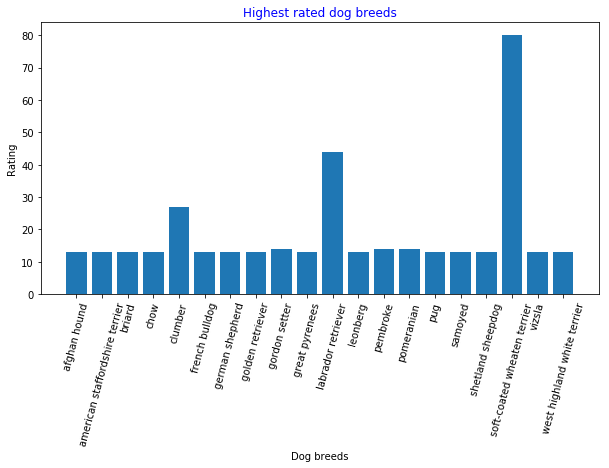

In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

mask = (twitter_master.p1_conf > 0.9) & (twitter_master.p1_dog == True) & (twitter_master.rating_numerator > 12)
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.bar(twitter_master[mask]['breed'],twitter_master[mask]['rating_numerator']);
plt.ylabel('Rating')
plt.xlabel('Dog breeds')
plt.title('Highest rated dog breeds',color='b')

We can see that the following three dog breeds have the highest ratings: dumber, labrador retriever and soft coated wheaten terrier.

#### Third Insight: Finding top three most common dog names.

In [53]:
twitter_master.name.value_counts()

Charlie         11
Lucy            11
Oliver          10
Cooper          10
Tucker           9
Penny            9
Winston          8
Sadie            8
Lola             8
Daisy            7
Toby             7
Bo               6
Koda             6
Stanley          6
Bella            6
Oscar            6
Bailey           6
Jax              6
Milo             5
Dave             5
Chester          5
Louis            5
Leo              5
Bentley          5
Rusty            5
Scout            5
Buddy            5
George           4
Boomer           4
Jerry            4
                ..
Bert             1
Alexanderson     1
Cleopatricia     1
Bilbo            1
Adele            1
Kaia             1
Dex              1
Mabel            1
Snickers         1
Flash            1
Filup            1
Meyer            1
Klein            1
Venti            1
Alexander        1
Skye             1
Darla            1
Lucia            1
Dietrich         1
Meera            1
Zeus             1
Lambeau     

Top three most common dog names are: Charlie, Lucy and Oliver.